In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Timeseries of AAPL230616C00150000 price

In [2]:
opt_prices_iv  = pd.read_csv('data/JPM240119C00150000_iv.csv')

In [3]:
opt_prices_iv = opt_prices_iv.set_index('date')
opt_prices_iv.index = pd.to_datetime(opt_prices_iv.index)

In [4]:
opt_prices_iv.head(5)

,price,underlying,daysToExp,bsm_iv
date,,,,
2021-09-13,26.12,151.720276,858,0.01
2021-09-14,25.20,149.072357,857,0.01
2021-09-16,26.00,150.040405,855,0.01
2021-09-20,22.65,145.171616,851,0.01
2021-09-21,23.38,145.190598,850,0.01


<AxesSubplot:xlabel='date'>

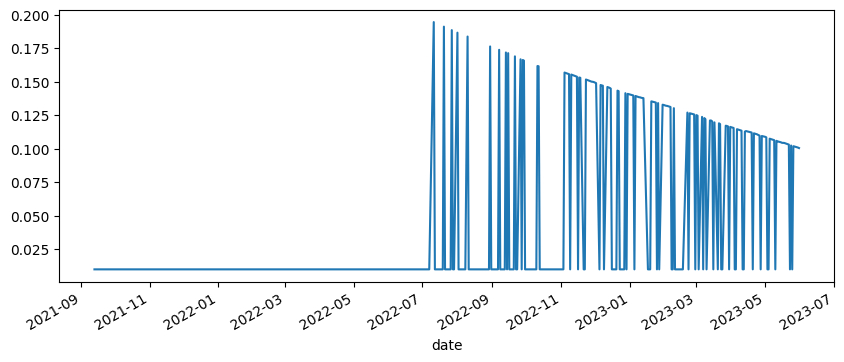

In [5]:
opt_prices_iv['bsm_iv'].plot(figsize=(10, 4))

# Pelt

In [6]:
import ruptures as rpt

ts = opt_prices_iv['price']
y = np.array(ts.tolist())

algo = rpt.Pelt(model="rbf")
algo.fit(y)
breaks = algo.predict(pen=3)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2021-09-21', '2021-11-29', '2022-01-03', '2022-01-18',
               '2022-02-23', '2022-04-06', '2022-06-08', '2022-10-21',
               '2023-03-10', '2023-05-31'],
              dtype='datetime64[ns]', freq=None)

In [7]:
len(breaks_rpt)

10

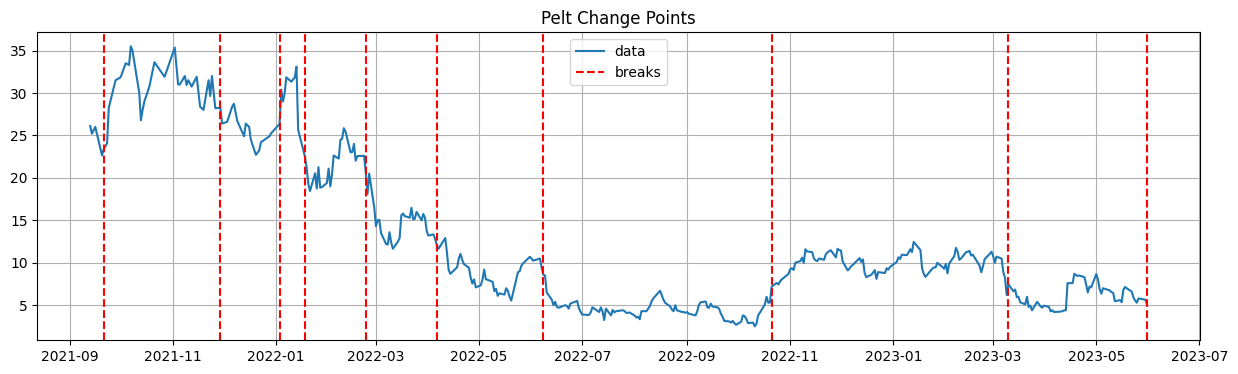

In [8]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)

plt.plot(ts, label='data')
plt.title('Pelt Change Points')

print_legend = True

for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')

plt.grid()
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
def regression_analysis(df, change_point_date):
    X = df['price'].values.reshape(-1, 1)
    y = df['bsm_iv'].values


    # change_point_date = '2022-10-19'#'yyyy-mm-dd'
    before_change = df[:change_point_date]
    after_change = df[change_point_date:]


    regressor_before = LinearRegression()
    regressor_before.fit(before_change['price'].values.reshape(-1, 1), before_change['bsm_iv'].values)

    regressor_after = LinearRegression()
    regressor_after.fit(after_change['price'].values.reshape(-1, 1), after_change['bsm_iv'].values)

    print('Changing Point:', change_point_date)
    print()

    print('Before Changing Point:')
    print('Intercept:', regressor_before.intercept_)
    print('Coefficient:', regressor_before.coef_)
    print()

    print('After Changing Point:')
    print('Intercept:', regressor_after.intercept_)
    print('Coefficient:', regressor_after.coef_)

    # Plotting Graph

    plt.scatter(before_change['price'], before_change['bsm_iv'], color='blue', label='Before Changing Point')
    plt.plot(before_change['price'], regressor_before.predict(before_change['price'].values.reshape(-1, 1)), color='blue')

    plt.scatter(after_change['price'], after_change['bsm_iv'], color='red', label='After Changing Point')
    plt.plot(after_change['price'], regressor_after.predict(after_change['price'].values.reshape(-1, 1)), color='red')

    plt.xlabel('Option Price')
    plt.ylabel('Volatility')
    plt.legend()

    plt.show()

Changing Point: 2021-11-29

Before Changing Point:
Intercept: 0.01
Coefficient: [0.]

After Changing Point:
Intercept: 0.06819844328960835
Coefficient: [-0.00197968]


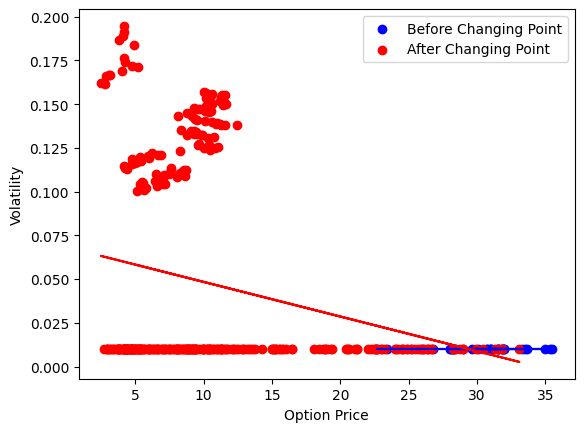

In [11]:
regression_analysis(df=opt_prices_iv, change_point_date='2021-11-29')

1
Changing Point: 2021-09-21 00:00:00

Before Changing Point:
Intercept: 0.01
Coefficient: [-0.]

After Changing Point:
Intercept: 0.06760344995817882
Coefficient: [-0.00191376]


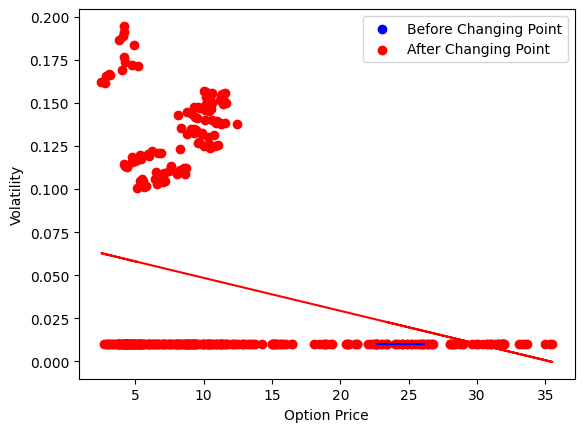

2
Changing Point: 2021-11-29 00:00:00

Before Changing Point:
Intercept: 0.01
Coefficient: [0.]

After Changing Point:
Intercept: 0.06819844328960835
Coefficient: [-0.00197968]


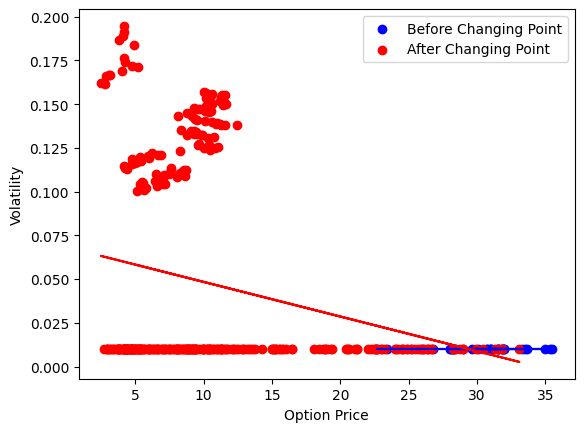

3
Changing Point: 2022-01-03 00:00:00

Before Changing Point:
Intercept: 0.01
Coefficient: [0.]

After Changing Point:
Intercept: 0.06725255219814272
Coefficient: [-0.00184933]


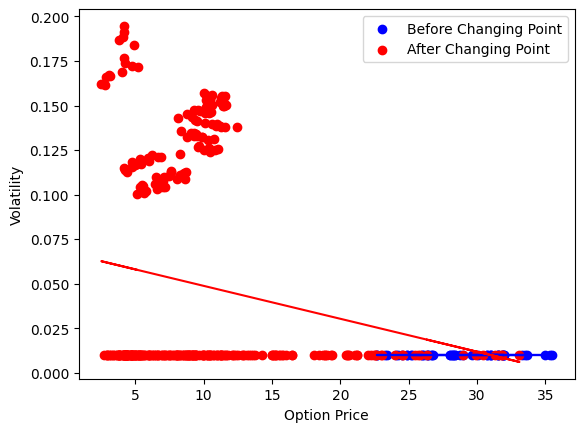

4
Changing Point: 2022-01-18 00:00:00

Before Changing Point:
Intercept: 0.010000000000000002
Coefficient: [4.80182658e-34]

After Changing Point:
Intercept: 0.06704231693917198
Coefficient: [-0.00182078]


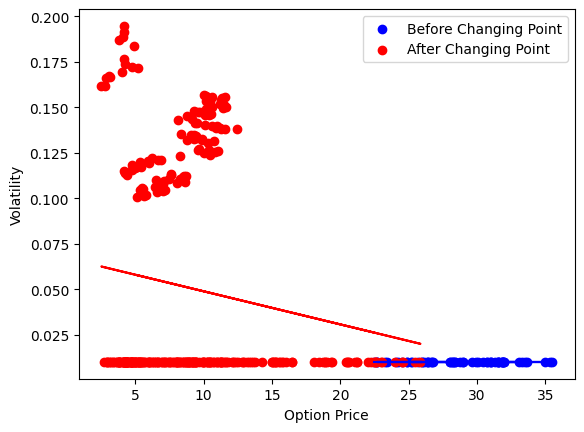

5
Changing Point: 2022-02-23 00:00:00

Before Changing Point:
Intercept: 0.01
Coefficient: [0.]

After Changing Point:
Intercept: 0.05591392461737798
Coefficient: [-0.00025104]


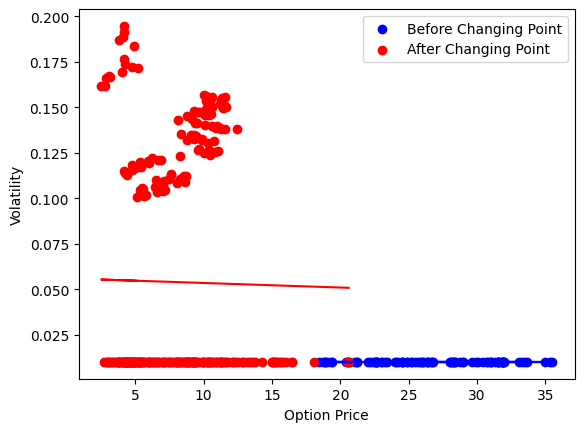

6
Changing Point: 2022-04-06 00:00:00

Before Changing Point:
Intercept: 0.009999999999999998
Coefficient: [2.15314936e-35]

After Changing Point:
Intercept: 0.025666838881032758
Coefficient: [0.00453582]


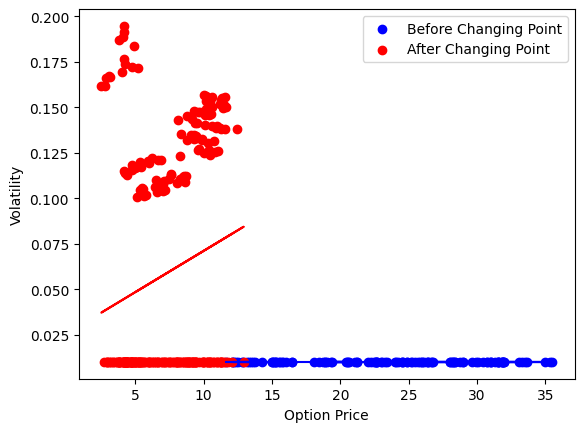

7
Changing Point: 2022-06-08 00:00:00

Before Changing Point:
Intercept: 0.009999999999999998
Coefficient: [-1.41788045e-35]

After Changing Point:
Intercept: 0.017272453745898066
Coefficient: [0.00703722]


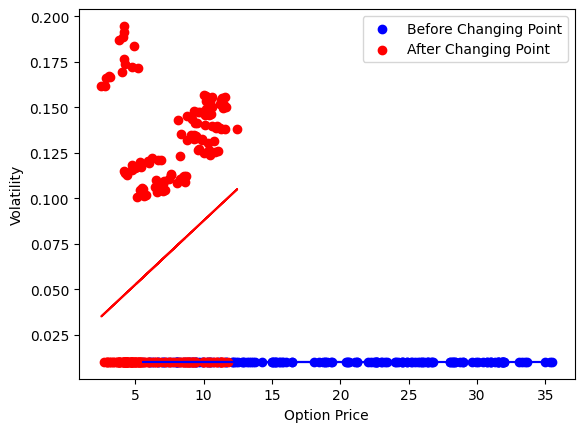

8
Changing Point: 2022-10-21 00:00:00

Before Changing Point:
Intercept: 0.034341263266931904
Coefficient: [-0.00100826]

After Changing Point:
Intercept: 0.04581879427594998
Coefficient: [0.00446243]


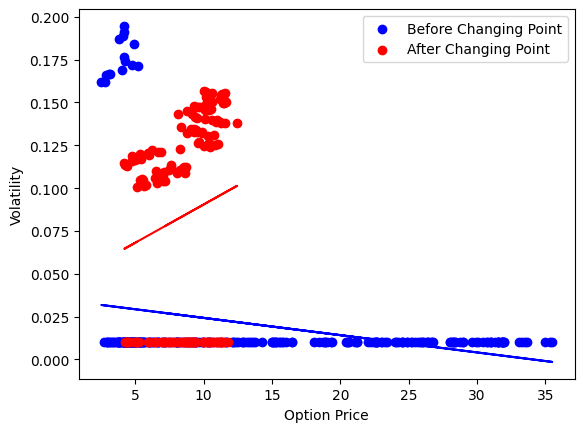

9
Changing Point: 2023-03-10 00:00:00

Before Changing Point:
Intercept: 0.059053557810663945
Coefficient: [-0.00159352]

After Changing Point:
Intercept: 0.03349751643901911
Coefficient: [0.00767824]


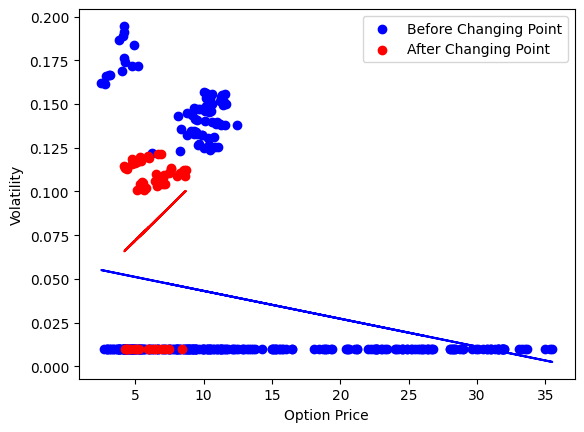

In [12]:
for i in range(len(breaks_rpt)-1): # exclude last one since no more data after
    print(i+1)
    regression_analysis(opt_prices_iv, breaks_rpt[i])

# Parametric Test (T-test)

In [13]:
from scipy.stats import ttest_ind

In [14]:
from datetime import datetime, timedelta

In [15]:
def t_test(data, change_point_date):
    print(change_point_date)
    change_point_date = pd.to_datetime(change_point_date) - timedelta(days=1)

    changing_point = pd.to_datetime(change_point_date) # '2022-11-02' # 2022-10-19 so we will substitute 2022-10-18 for convenience in the next 2 lines
    data_before = data[:changing_point]
    data_after = data[changing_point:]

    volatility_before = data_before['bsm_iv']
    volatility_after = data_after['bsm_iv']

    # T-test
    t_stat, p_value = ttest_ind(volatility_before, volatility_after)


    print("T-Statistic: ", t_stat)
    print("P-Value: ", p_value)

    # Interpretations
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a statistically significant difference in volatility before and after the changing point.")
    else:
        print("There is no statistically significant difference in volatility before and after the changing point.")


In [16]:
counter = 1
for i in breaks_rpt:
    print(counter)
    counter += 1
    t_test(opt_prices_iv, i)
    print()
    print()

1
2021-09-21 00:00:00
T-Statistic:  -1.2150989640105778
P-Value:  0.2250541547452272
There is no statistically significant difference in volatility before and after the changing point.


2
2021-11-29 00:00:00
T-Statistic:  -3.751206208640144
P-Value:  0.00020240632306959042
There is a statistically significant difference in volatility before and after the changing point.


3
2022-01-03 00:00:00
T-Statistic:  -4.641509171669017
P-Value:  4.717337625702492e-06
There is a statistically significant difference in volatility before and after the changing point.


4
2022-01-18 00:00:00
T-Statistic:  -5.202393290309797
P-Value:  3.170781154354063e-07
There is a statistically significant difference in volatility before and after the changing point.


5
2022-02-23 00:00:00
T-Statistic:  -6.558100326651566
P-Value:  1.7095979951839894e-10
There is a statistically significant difference in volatility before and after the changing point.


6
2022-04-06 00:00:00
T-Statistic:  -8.263248320741205
P-Va

/var/folders/xd/xm863f553v750zss70sl77sc0000gn/T/ipykernel_1778/1458161964.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(volatility_before, volatility_after)
